# ¿Qué es K-means?

**K-means** es un algoritmo de *aprendizaje no supervisado* que se utiliza para resolver problemas de **clustering** o agrupamiento. Su objetivo es dividir un conjunto de datos en **K grupos** (o "clusters") de manera que los elementos dentro de cada grupo sean lo más parecidos posible entre sí y diferentes de los elementos en otros grupos.


## ¿Qué hace K-means?

Imagina que tienes muchos puntos dispersos en un plano y quieres agruparlos por cercanía. K-means hace esto en tres pasos principales:

1. **Inicializa K centroides** (centros de grupo) de forma aleatoria.
2. **Asigna cada punto al centro más cercano** (según distancia euclidiana).
3. **Recalcula los centroides** como el promedio de los puntos asignados a cada grupo.

Repite los pasos 2 y 3 hasta que los grupos ya no cambian (convergencia).


## ¿Cómo funciona? (más formal)

Dado un conjunto de datos $\{x_1, x_2, \dots, x_n\}$, y un número de clusters $K$:

1. Inicializa $K$ centroides $\mu_1, \mu_2, \dots, \mu_K$
2. Repite hasta convergencia:
   - **Asignación**: cada punto se asigna al centro más cercano:  
     $$ c_i = \arg\min_k \|x_i - \mu_k\|^2 $$
   - **Actualización**: recalcula cada centro como el promedio de los puntos asignados a ese grupo:  
     $$ \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i $$

El objetivo es minimizar la **suma de distancias cuadradas dentro del cluster**:
$$ J = \sum_{k=1}^K \sum_{x_i \in C_k} \|x_i - \mu_k\|^2 $$


### Apendice: ¿Cómo se calcula la asignación de clusters en K-means?

El paso de asignación en K-means busca asignar cada punto de datos $x_i$ al **centroide más cercano** $\mu_k$.

Se hace utilizando la siguiente fórmula:

$$
c_i = \arg\min_k \|x_i - \mu_k\|^2
$$

---

### Paso a paso:

1. **Tienes un punto** $x_i \in \mathbb{R}^n$  
   Ejemplo: $x_i = [2.5,\ 1.0]$

2. **Tienes $K$ centroides** $\mu_1, \mu_2, ..., \mu_K$  
   Ejemplo:  
   $\mu_1 = [1.0,\ 1.0]$  
   $\mu_2 = [3.0,\ 3.0]$

3. Calculas la **distancia euclidiana al cuadrado** entre el punto $x_i$ y cada centroide $\mu_k$:

$$
\|x_i - \mu_k\|^2 = \sum_{j=1}^n (x_{ij} - \mu_{kj})^2
$$

Ejemplo:

- $\|x_i - \mu_1\|^2 = (2.5 - 1.0)^2 + (1.0 - 1.0)^2 = 2.25 + 0 = 2.25$
- $\|x_i - \mu_2\|^2 = (2.5 - 3.0)^2 + (1.0 - 3.0)^2 = 0.25 + 4 = 4.25$

4. Asignas el punto $x_i$ al centroide más cercano:

$$
c_i = \arg\min_k \|x_i - \mu_k\|^2
$$

En este caso:

$$
c_i = 1
$$

Porque el centroide $\mu_1$ está más cerca que $\mu_2$.


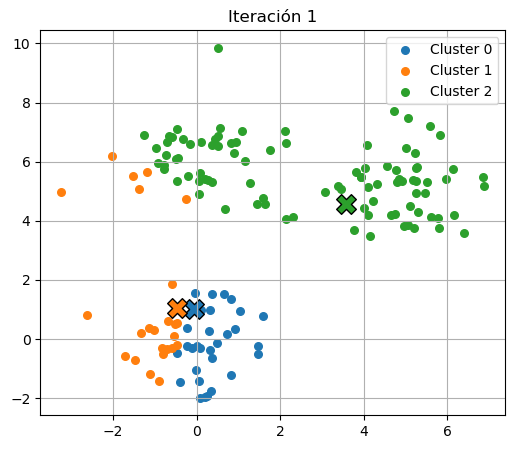

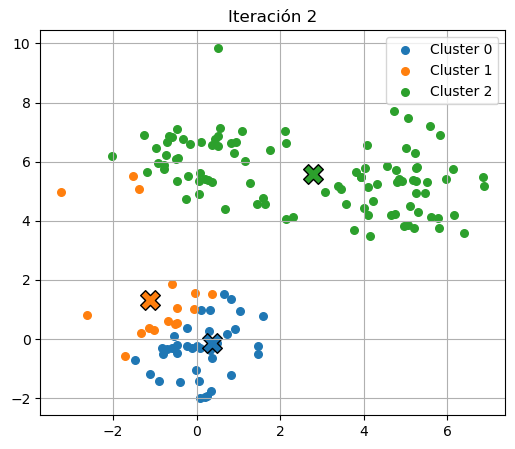

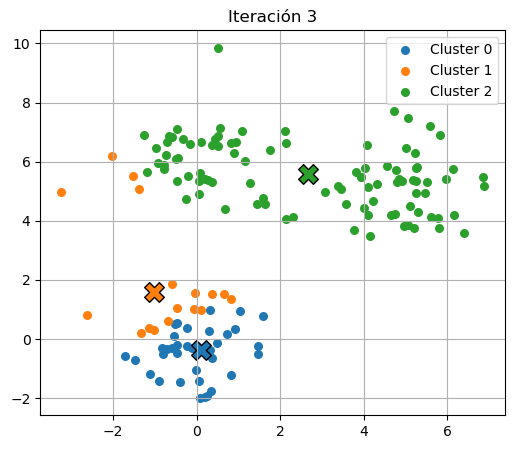

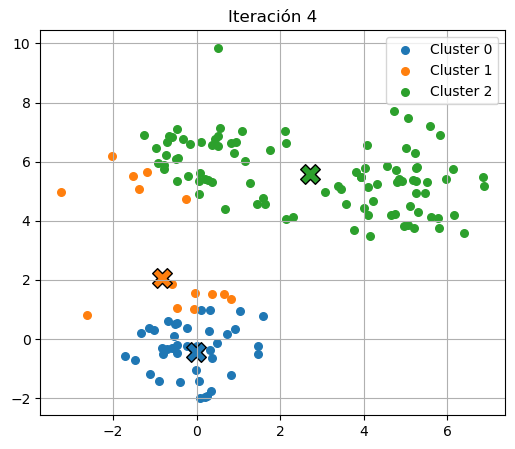

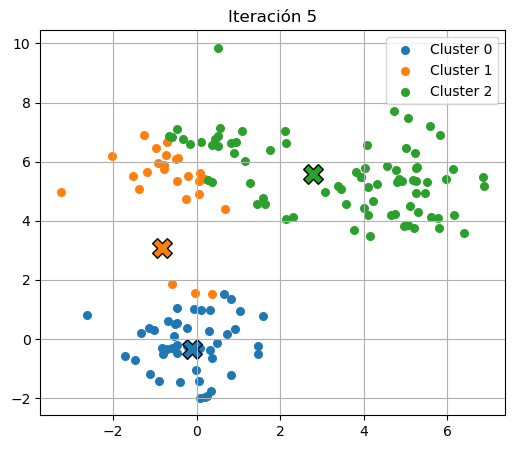

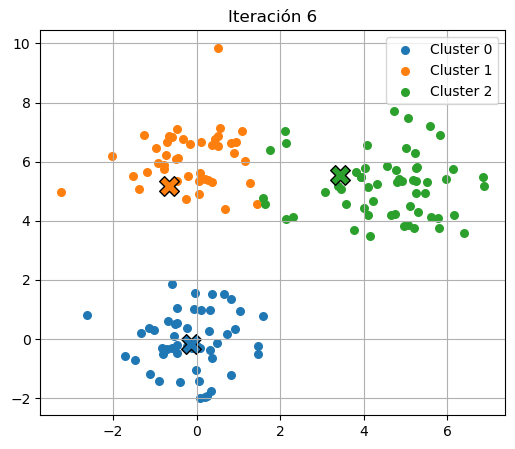

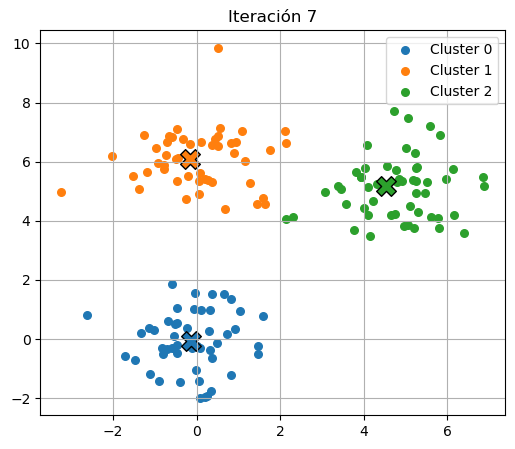

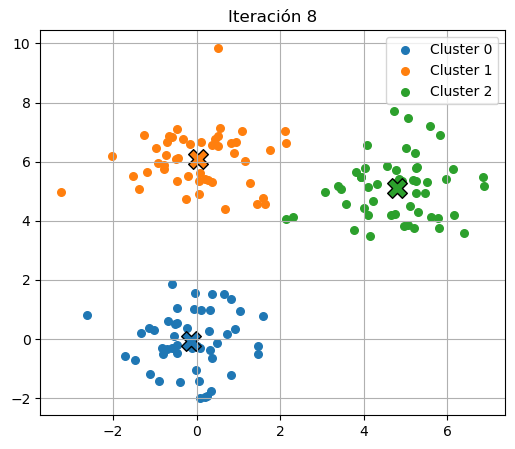

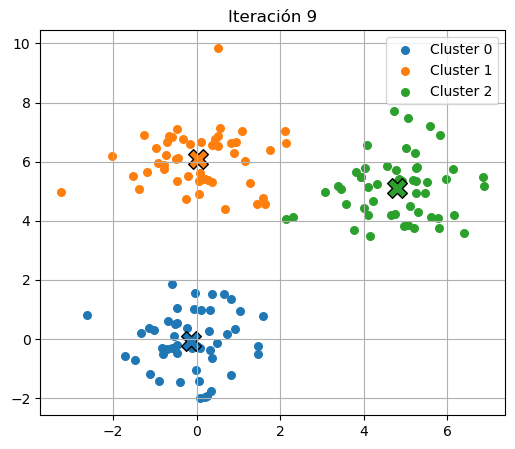

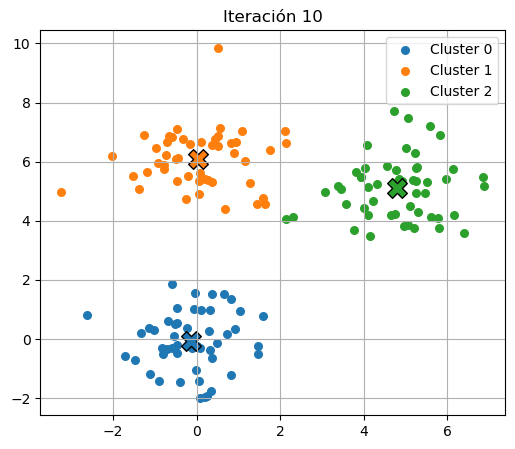

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import warnings

# Suprimir warnings (como los de matplotlib por el borde del marcador)
warnings.filterwarnings("ignore")

# Generar datos artificiales en 2D
np.random.seed(42)
X1 = np.random.randn(50, 2) + np.array([0, 0])
X2 = np.random.randn(50, 2) + np.array([5, 5])
X3 = np.random.randn(50, 2) + np.array([0, 6])
X = np.vstack((X1, X2, X3))

# Parámetros
K = 3
n_iter = 10

# Inicializar centroides aleatorios desde los datos
centroids = X[np.random.choice(X.shape[0], K, replace=False)]

for iteration in range(n_iter):
    
    # Paso 1: asignación
    labels = []
    for xi in X:
        dists = [np.sum((xi - mu_k) ** 2) for mu_k in centroids]
        ci = np.argmin(dists)
        labels.append(ci)
    labels = np.array(labels)
    
    # Paso 2: actualización
    new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    
    # Visualización
    plt.figure(figsize=(6, 5))
    cmap = get_cmap("tab10")
    for k in range(K):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=cmap(k), label=f"Cluster {k}")
        plt.scatter(centroids[k, 0], centroids[k, 1], color=cmap(k), marker='X', s=200, edgecolor='k')

    plt.title(f"Iteración {iteration + 1}")
    plt.legend()
    plt.grid(True)
    plt.show()    
    centroids = new_centroids
